In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
# https://archive.ics.uci.edu/ml/datasets/seeds 
data = pd.read_csv('data/seeds_dataset.txt', sep='\s+', header=None)
data.round(3).to_csv('data/seeds_dataset.csv', index=False, header=None)
data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
x = data.iloc[:, [0,1,2,3,4,5,6]].values

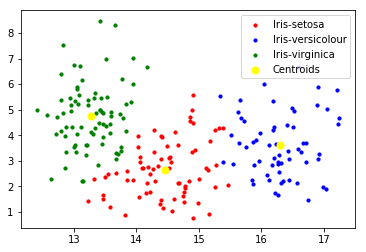

In [34]:
kmeans = KMeans(n_clusters = 3, init='k-means++',max_iter=300,n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 5], s = 10, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 5], s = 10, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 5], s = 10, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,5], s = 50, c = 'yellow', label = 'Centroids')

plt.legend()

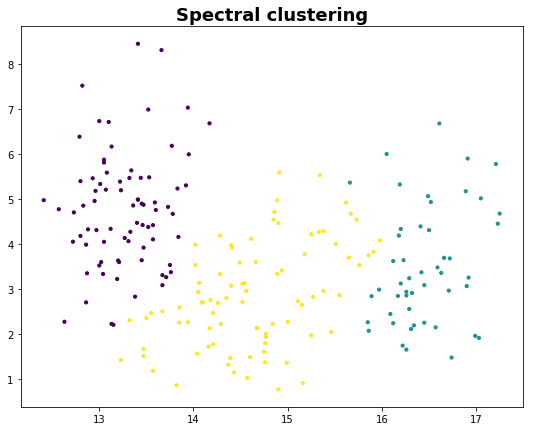

In [33]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',assign_labels='kmeans')

labelsS = model.fit_predict(x)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Spectral clustering', fontsize=18, fontweight='demi')
plt.scatter(x[:, 1], x[:, 5], c=labelsS, s=10)